# Linear regression of NEMO surface tracer PCA results

Fig. 9 from Moore-Maley and Allen, 2022, Ocean Sci.:

***

In [1]:
import numpy as np
import xarray as xr
import pymc3 as pm
from matplotlib import pyplot as plt, colors
from datetime import datetime

import tools

%matplotlib inline

In [2]:
plt.rcParams['font.size'] = 12

***

### Load data

In [3]:
# Get hardcoded seasonal index
seasonbounds, seasonindex = tools.get_seasonal_indices()

# Load NEMO aggregation results
with xr.open_dataset('/data/bmoorema/results/EOF_paper/EOF_paper_model_fields.nc') as ds:
    tau_along = ds.tau_along.values

# PCA results
ds = {var: xr.open_dataset(f'/data/bmoorema/results/EOF_paper/{var}_PCA.nc') for var in ('temperature', 'nitrate')}

Linear regression functions

In [4]:
def backaverage(data, w, seasonbounds):
    """Backaverage data input record (i.e., tau) using window w between seasonbounds
    """
    
    data_avg = [[data[i-min(i, w+1):i].mean() for i in range(*bounds)] for bounds in seasonbounds]
    
    return np.hstack(data_avg)


def linreg(x, y, nsamples=1000):
    """Calculate Bayesian linear regression over nsamples using the PyMC3 library
    https://docs.pymc.io/en/v3/pymc-examples/examples/generalized_linear_models/GLM-linear.html
    """

    # Calculate linear regression using PyMC3
    with pm.Model() as model:
        sigma = pm.HalfCauchy("sigma", beta=10, testval=1.0)
        intercept = pm.Normal("Intercept", 0, sigma=20)
        x_coeff = pm.Normal("x", 0, sigma=20)
        likelihood = pm.Normal("y", mu=intercept + x_coeff * x, sigma=sigma, observed=y)
        trace = pm.sample(nsamples, cores=2)

    # Define mean fit
    coeffs = [trace['Intercept'].mean(), trace['x'].mean()]
    x_mean = np.linspace(-0.2, 0.2, 100)
    y_mean = coeffs[0] + coeffs[1] * x_mean
    
    # Randomly sample individual fits
    y_sample = []
    for k in np.random.randint(0, len(trace), nsamples):
        y_sample.append(trace[k]['Intercept'] + trace[k]['x'] * x_mean)
    y_sample = np.vstack(y_sample)
    
    # Calculate 99% confidence intervals
    CI = [np.percentile(y_sample, p, axis=0) for p in (1, 99)]
    
    # Calculate Bayesian R^2, defined similarly as PyMC3 dependencey ArviZ
    # https://github.com/arviz-devs/arviz/blob/main/arviz/stats/stats.py
    var_y = np.var(trace['Intercept'].mean() + trace['x'].mean() * x)
    r2 = var_y / (var_y + trace['sigma'].mean()**2)
    
    # Return equation string label
    eq = f'y = {coeffs[1]:.1f}x - {abs(coeffs[0]):.1f}'
    
    return x_mean, y_mean, CI, r2, eq

***

### Make figure

/tmp/ipykernel_12607/2775128284.py:21: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(nsamples, cores=2)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [x, Intercept, sigma]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 4 seconds.
/tmp/ipykernel_12607/2775128284.py:21: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(nsamples, cores=2)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [x, Intercept, sigma]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 4 seconds.
/tmp/ipykernel_12607/2775128284.py:21: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(nsamples, cores=2)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [x, Intercept, sigma]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 3 seconds.
/tmp/ipykernel_12607/2775128284.py:21: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(nsamples, cores=2)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [x, Intercept, sigma]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 5 seconds.
/tmp/ipykernel_12607/2775128284.py:21: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(nsamples, cores=2)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [x, Intercept, sigma]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 3 seconds.
/tmp/ipykernel_12607/2775128284.py:21: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(nsamples, cores=2)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [x, Intercept, sigma]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 4 seconds.
The acceptance probability does not match the target. It is 0.8794083654382236, but should be close to 0.8. Try to increase the number of tuning steps.


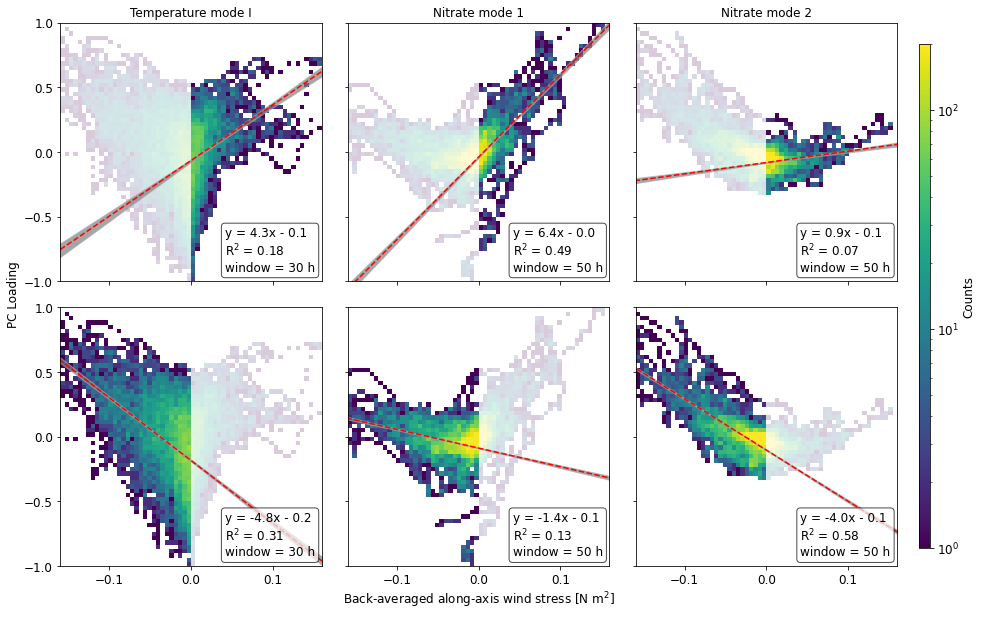

In [5]:
# Build figure layout
fig, axs = plt.subplots(2, 3, figsize=(15, 10), gridspec_kw={'wspace': 0.1, 'hspace': 0.1})        
xlim, ylim = np.array([-0.16, 0.16]), [-1, 1]
props = {'fc': 'w', 'boxstyle': 'round', 'alpha': 0.7}

# Loop through modes
for col, var, mode in zip(axs.T, ['temperature', 'nitrate', 'nitrate'], [0, 0, 1]):
    
    # Define x,y points
    if var == 'temperature': w, m = 30, 'I'
    else: w, m = 50, mode + 1
    sign = 1 if mode == 1 else -1
    B = ds[var]['B'][:, mode].values
    norm = sign * np.percentile(B, 99.99)
    x, y = backaverage(tau_along, w, seasonbounds), B / norm
    
    # Loop through signs of wind stress
    for ax, func in zip(col, ['greater', 'less']):
        
        # Plot 2d histogram
        _, _, _, c = ax.hist2d(x, y, bins=60, range=[xlim, ylim], norm=colors.LogNorm(vmin=1, vmax=200))
        
        # Shade half of x axis
        shaded = np.repeat(xlim[~getattr(np, func)(xlim, 0)][0], 2)
        ax.fill_betweenx(ylim, shaded, fc='w', alpha=0.8)
        
        # Plot linear regress
        index = getattr(np, func)(x, 0)
        x_mean, y_mean, CI, r2, eq = linreg(x[index], y[index])
        ax.fill_between(x_mean, *CI, ec='darkgray', fc='gray', alpha=0.7)
        ax.plot(x_mean, y_mean, 'r--')
        ax.text(0.63, 0.04, f'{eq}\nR$^{2}$ = {r2:.2f}\nwindow = {w} h', transform=ax.transAxes, bbox=props)
        
        # Formatting
        ax.set_xlim(xlim)
        ax.set_ylim(ylim)
        ax.xaxis.set_ticks([-0.1, 0, 0.1])
        ax.yaxis.set_ticks([-1, -0.5, 0, 0.5, 1])
        if func == 'greater':
            ax.xaxis.set_ticklabels('')
            ax.set_title(f'{var.capitalize()} mode {m}', fontsize=12)
        if var == 'nitrate': ax.yaxis.set_ticklabels('')

# Final formatting
axs[1, 1].set_xlabel('Back-averaged along-axis wind stress [N m$^{2}$]')
axs[1, 0].set_ylabel('PC Loading', y=1.05)
cax = fig.add_axes([0.92, 0.15, 0.01, 0.7])
fig.colorbar(c, cax=cax, label='Counts')